In [1]:
from specim.specfuncs import spec1d
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_red_data_20201120/0147m1/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    #if 'spec1d' in p and  '0053m1' in p:
        #if '.fits' in p:
    file_list.append(p)
    #frame = p.split('_')[-3][:4]
    #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
 

In [10]:
file_list

['../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0033-0147m1_LRISr_2020Nov21T064853.453.fits',
 '../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0034-0147m1_LRISr_2020Nov21T073239.926.fits',
 '../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0035-0147m1_LRISr_2020Nov21T081628.474.fits',
 '../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0032-0147m1_LRISr_2020Nov21T060511.558.fits',
 '../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0036-0147m1_LRISr_2020Nov21T090046.570.fits']

In [12]:
for i, p in enumerate(file_list):
    if i==0:
        spec = deimosmask1d.DeimosMask1d(p)
        info = spec.slitinfo
        print(info)
        #for i in range(spec1.nspec):
            #spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
            #specid.append(spec_id)
            #print(spec_id)
    else:
        spec1 = deimosmask1d.DeimosMask1d(p)
        info = spec1.slitinfo
        print(info)
    if i!=0:
        spec = spec.coadd(spec1)
        info = spec.slitinfo
        print(info)

Reading 11 spectra from:
  ../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0033-0147m1_LRISr_2020Nov21T064853.453.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    201     1     201 8.253162862898272
  2    282     1     279 11.42141203122733
  2    400     1     374 6.678010015762923
  2    400     2     398 6.608041267099134
  2    543     1     567 10.94446735232169
  2    660     1     670 7.135254116708982
  2    822     1     822 7.355306826393459
  2    910     1     911 7.649419261079369
  2   1072     1    1068 6.221598014024544
  2   1172     1    1159  5.83370912132002
  2   1343     1    1368 7.681264885628532
Reading 13 spectra from:
  ../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0034-0147m1_LRISr_2020Nov21T073239.926.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    201     1     200 8.210772505525991
  2    282     1     278 12.98224027823706
 

In [5]:
spec1 = deimosmask1d.DeimosMask1d(file_list[0])
spec2 = deimosmask1d.DeimosMask1d(file_list[])

Reading 11 spectra from:
  ../galaxy_spectra/LRIS_red_data_20201120/0147m1/spec1d_r201121_0033-0147m1_LRISr_2020Nov21T064853.453.fits


In [15]:
specid = [] #np.zeros(coadded_spectra.nspec)
info = spec.slitinfo
#print(info)
for i in range(spec.nspec):
    spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
    specid.append(spec_id)
    print(spec_id)

2_543_1_567


spec_id : 2_543_1_567


<IPython.core.display.Javascript object>


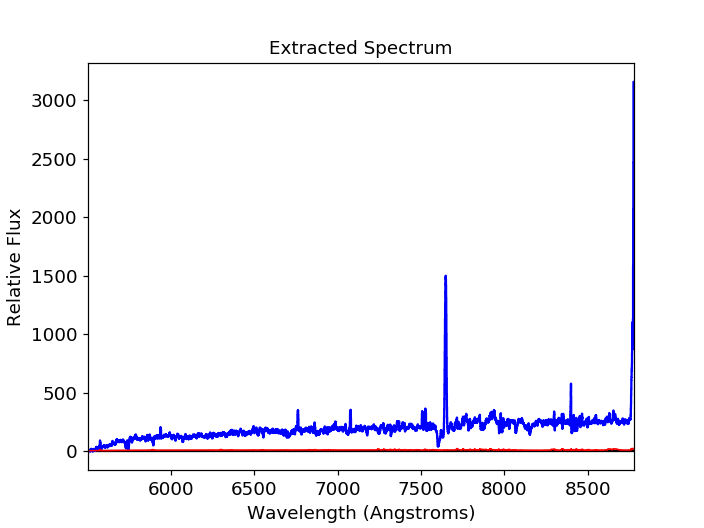

In [16]:
%matplotlib notebook

for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    spec[specid[i]].smooth(7)